# Answers : 
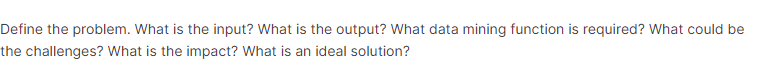 


**1_Define the problem. What is the input? What is the output?**

The problem is to predict the product ratings of Wish.com products based on other features of the products. The input is the various features of the products such as product type, description, price, and image, among others. The output is the predicted product rating, which is in categories from 1 to 5. The goal is to estimate how likely people will like a product and understand the conditions under which a product will be highly rated.


**2_What data mining function is required?**
The data mining function required is classification or prediction since the goal is to predict the product rating based on other features of the product.

**3_What could be the challenges?**

The challenges could include dealing with noisy data, missing values, and irrelevant or unnecessary features. Also, the features included in the dataset may not be sufficient to accurately predict the product rating, which may require additional data sources or feature engineering.

**4_What is the impact?**

The impact of accurately predicting the product rating is that it can help businesses understand their customer base and tailor their products to meet customer preferences. It can also help businesses identify the features that are most important to customers, which can inform product development and marketing strategies.

**5_What is an ideal solution?**

My expermint SVM is the Ideal model for this problem.
but in general An ideal solution would be to develop a machine learning model that accurately predicts the product rating based on the available features, while also being able to handle missing or noisy data. The model should also be easily interpretable, so that businesses can understand the factors that are most important for predicting product ratings. Additionally, the model should be regularly updated with new data to ensure its accuracy over time. 

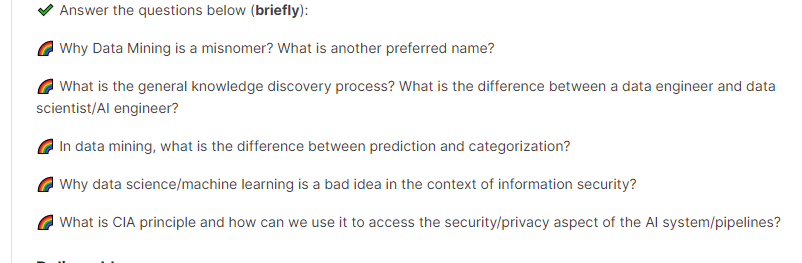


**1_**Data mining is a misnomer because the term implies that mining for data is the primary objective, when in reality, the objective is to extract useful knowledge from data. Another preferred name is Knowledge Discovery in Databases (KDD).

**2_**The general knowledge discovery process involves several steps including data selection, data pre-processing, data transformation, data mining, pattern evaluation, and knowledge representation. This process involves identifying patterns and relationships within the data to gain insights and make predictions.

A data engineer is responsible for designing, building, and maintaining the infrastructure that supports the storing, processing, and analysis of data. A data scientist or AI engineer is responsible for developing and applying statistical and machine learning techniques to extract insights and make predictions from data.

**3_**In data mining, prediction involves using historical data to make a prediction about future events or outcomes. Categorization involves grouping data into predetermined categories based on similarities or differences.

**4_**Data science and machine learning can be a bad idea in the context of information security because they can be used for malicious purposes such as hacking, phishing, and identity theft. These technologies can also be used to analyze large amounts of data from various sources to identify vulnerabilities or weaknesses in security systems.

**5_**The CIA principle refers to the three main goals of information security: confidentiality, integrity, and availability. Confidentiality ensures that data is accessed only by authorized individuals, integrity ensures that data is accurate and consistent, and availability ensures that data is accessible to authorized individuals when needed. To assess the security and privacy aspects of an AI system or pipeline, we can evaluate how well it protects these three aspects of information security.

**The problem at hand** 

is to build a model to predict the rating of products on the Wish E-commerce platform using input features such as price, retail price, product size, and product color. The objective is to answer questions such as what the top-selling products are, which features are most important in predicting product success, and what the expected product rating will be before listing it on the site. However, the dataset is unclean, requiring significant preprocessing.

Another challenge is that the dataset is imbalanced, with a large number of products rated 4 and only a few rated 2. The impact of solving this problem is that businesses can make informed decisions about which products to market and how to tailor them to customer preferences. Additionally, understanding the factors that drive product success can inform product development and marketing strategies.

**The data mining function** 

required is classification or prediction, as the goal is to predict the product rating based on input features.

**The data mining**

 process utilizes classification and prediction techniques to transform raw data into a format that can be analyzed. To ensure that the data is suitable for analysis, it undergoes several important steps.

The first step is data processing, where irrelevant and unnecessary features are identified and removed, null values are checked and replaced, and new features are created from existing ones if necessary. Additionally, categorical variables are cleaned in this step.

The second step involves converting categorical and string columns into numerical columns so that they can be used with machine learning models.

Finally, the best model is selected by building and testing various models on the pre-processed data. This ensures that the most accurate and effective model is used for data analysis.

# First:

**import all required packages**

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
'''
imports necessary libraries for natural language processing, machine learning modeling, 
and evaluation. re is used for regular expressions, math is used for mathematical operations,
warnings is used to ignore warning messages during runtime. MinMaxScaler is used for scaling the data, 
CountVectorizer and ENGLISH_STOP_WORDS are used for text processing tasks, Counter is used to count 
elements in a list. DecisionTreeClassifier, 
GridSearchCV, SVC, metrics, and MultinomialNB are used for machine learning modeling and evaluation.
''' 
import re
import math
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
#imports train_test_split from Scikit-learn and prints the version of Scikit-learn that is currently installed.
from sklearn.model_selection import train_test_split
import sklearn
print(sklearn.__version__)

1.2.2


# Second: 

**read wish dataset**

1_The first step involves loading the training dataset.

2_The second step involves loading the testing dataset.

3_In the third step, any rows with a rating value of 6 are dropped since the rating range is from 1 to 5.

4_The fourth step is to merge both datasets since there may be values in the test set that are not present in the training set, and vice versa. When certain columns are one-hot encoded, the number of features in both datasets should be equal to ensure compatibility when they are split again.

5_The fifth step involves examining the data to gain an understanding of its structure and characteristics.

In [57]:
#sets the maximum number of rows to display 
warnings.filterwarnings("ignore")
#pd.set_option('display.max_rows', None)
#ets the maximum number of columns to display
pd.set_option('display.max_columns', None)
#prints the current NumPy
np.printoptions()

In [58]:
# read the data set
df1 = pd.read_csv('train_new.csv')
df2= pd.read_csv('test_new.csv')
#drops any rows with a rating value of 6 and resets the index
df1 = df1[df1['rating'] != 6]
df1 = df1.reset_index(drop=True)
#code concatenates the two dataframes and drops several columns
frames = [df1, df2]
df = pd.concat(frames,ignore_index=True)
df = df.drop(['theme','urgency_text','merchant_title','merchant_info_subtitle','currency_buyer','merchant_name','merchant_id','merchant_profile_picture','crawl_month'],axis=1)


#this columns we'll change their types to categorical datatype after cleaning them.
columns = ['merchant_has_profile_picture','has_urgency_banner','badge_local_product','badge_product_quality','badge_fast_shipping','shipping_is_express','product_variation_size_id','product_color']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1572 non-null   float64
 1   retail_price                  1572 non-null   int64  
 2   units_sold                    1572 non-null   int64  
 3   uses_ad_boosts                1572 non-null   int64  
 4   rating                        1093 non-null   float64
 5   rating_count                  1572 non-null   int64  
 6   badges_count                  1572 non-null   int64  
 7   badge_local_product           1572 non-null   int64  
 8   badge_product_quality         1572 non-null   int64  
 9   badge_fast_shipping           1572 non-null   int64  
 10  tags                          1572 non-null   object 
 11  product_color                 1531 non-null   object 
 12  product_variation_size_id     1558 non-null   object 
 13  pro

# Third:

 **clean "has_urgency_banner column".**
we will replace null values in this column with 0, since it has only 1 and null values.

In [59]:
# fills any NaN values in the 'has_urgency_banner' column with 0
df['has_urgency_banner'] = df['has_urgency_banner'].fillna(0)


# Fourth: 

**Normalize numeric columns values between 0 and 1 to handel outliers.**

In [60]:
#min_max_scaler constructor
min_max_scaler = MinMaxScaler()
#extract integer columns
myCols = df.select_dtypes(include='int64').columns
#normlize integer columns
df[myCols] = min_max_scaler.fit_transform(df[myCols])
#normalize float columns
df[['price','merchant_rating']] = min_max_scaler.fit_transform(df[['price','merchant_rating']])

# Fifth: 

**polt each value count in each column**

In [61]:
''' creates histograms and countplots based on the data type of a given column in a pandas dataframe.

If the data type of the column is not 'int64' or 'float64', the function creates a countplot to show the frequency of each value in the column.

If the data type of the column is 'int64' or 'float64', the function creates a histogram to show the distribution of values in the column.

The function takes two arguments: 'column' is the name of the column in the dataframe that the function will create a plot for, and 'data' is the pandas dataframe that contains the column.

The plots generated by the function are displayed using the matplotlib and seaborn libraries.'''
def histograms_and_countplots(column, data):
        if data[column].dtype not in ['int64', 'float64']:
            f, axes = plt.subplots(1,1,figsize=(15,5))
            sns.countplot(x=column, data = data)
            plt.xticks(rotation=90)
            plt.suptitle(column,fontsize=20)
            plt.show()
        else:
            g = sns.FacetGrid(data, margin_titles=True, aspect=4, height=3)
            g.map(plt.hist,column,bins=100)
            plt.show()
        plt.show()

# Sixth: 
**create submission file.**
note: the file that you'll pass it to that function should contain columns names (id, rating) and id values

In [62]:
'''creates a sample submission file for a machine learning competition based on the predicted values and test data.

The function takes three arguments: 'file_path' is the path to the submission file, 'predicted_values' is a list of predicted values for each entry in the test data, and 'X_test' is a list of test data entries (in this case, the ids).

The function first reads in the empty submission file, which contains only column names. It then adds the predicted values and test data to the dataframe by creating two new columns, 'rating' and 'id', respectively. Finally, the function writes the changes to the submission file by overwriting the original file with the updated dataframe.

The resulting file can then be submitted to the machine learning competition to evaluate the model's performance.'''
def create_sample_file(file_path,predicted_values, X_test):
    df = pd.read_csv(file_path) #empty file with column names
    df['rating'] = predicted_values #prediction values
    df['id'] = X_test
    df.to_csv(file_path, index=False) #write changes

# Seventh: 
**replace low-frequancy values with value of my choice**
As one can see, there is a lot of distinct values in some column . Most of these values are either redundant or irrelevant due to low frequency count.

In [63]:
'''replaces values in a column of a pandas dataframe that appear 2 times or less with a specified value.'''
def replace_less_values(col,value_to_be_replaced):
    #extract values with count 2 or less than 2
    bool_lst = [df[col].value_counts() <= 2]
    lst = list(df[col].value_counts().index[tuple(bool_lst)])
    #replace them with value of my choice
    df[col].replace(dict.fromkeys(lst, value_to_be_replaced),inplace=True)

# Eighth: 

**clean size column.**
step 1: replace null values with 'ANOTHER_SIZE' value.

step 2: replace some redundant values with true values based on regular expression pattern ex ('SIZEL' will be 'L', SIZE\S will 'S').

step 3: replace some values like XXXXS will be 4XS.

In [64]:
'''cleans and standardizes product size data in a pandas dataframe column.

The function takes a cell value from the column as an argument and applies several transformations to it.

First, if the cell value is null or NaN, it is replaced with the string "ANOTHER_SIZE".

Next, the function applies a regular expression pattern to the cell value to extract the standardized product size. If the cell value does not match the pattern, it is returned as is.

If the cell value contains more than one 'X' and ends with either 'XS' or 'XL', the function replaces the value with the number of 'X's in the value followed by the last character. For example, "2XL" would become "2Xl".

The cleaned product size value is then returned by the function.'''
def clean_product_size(cell):
    
    #replace null values with "ANOTHER_SIZE"
    if not isinstance(cell,str) and math.isnan(cell):
        return "ANOTHER_SIZE"

    #set some regex patterns    
    pattern = re.compile(r'(\bL\b|(?<=[^MF])L|\bX+S|S\b|\bS\b|\dXS|\bM\b|\d?X+L)')
    match = re.search(pattern,cell)
    #if value doesn't match the pattern don't do anything.
    if match is not None:
        cell = match[0]

    #if value has more than X replace the value the number of X's       
    if cell.count('X') > 1 and (cell.endswith('XS') or cell.endswith('XL')):
        cell = f"{cell.count('X')}X{cell[-1]}"
        
    return cell    

In [65]:
#Count of product_variation_size_id before the cleaning.
print(df['product_variation_size_id'].value_counts())
df['product_variation_size_id'] = df['product_variation_size_id'].str.upper()
df.product_variation_size_id = df.product_variation_size_id.apply(clean_product_size)
replace_less_values('product_variation_size_id','ANOTHER_SIZE')
#Count of product_variation_size_id after the cleaning.
df.product_variation_size_id.value_counts()

S                641
XS               356
M                200
XXS              100
L                 49
                ... 
XXXXXL             1
20PCS-10PAIRS      1
Size-5XL           1
Size/S             1
36                 1
Name: product_variation_size_id, Length: 106, dtype: int64


S               703
XS              369
M               206
2XS             107
ANOTHER_SIZE     59
L                58
2XL              19
XL               18
4XL              10
3XS               6
3XL               4
5XL               4
10 ML             3
34                3
33                3
Name: product_variation_size_id, dtype: int64

# Nineth: 
**clean product color column**

step 1: convert all values to upper case.

step 2: replace all null values to "ANOHTER COLOR"

step 3: replace some low-frequancy values to thier true value manually EX (GRAY (low-frequany count) will be GREY (high-frequancy count), ROSE RED will be RED).

step 4: replace low-frequancy values with "ANOTHER_COLOR"

In [66]:
#converts all strings in the 'product_color' column to uppercase.
df['product_color'] = df['product_color'].str.upper()
#fills any NaN values in the 'product_color' column with the string 'ANOTHER_COLOR'.
df['product_color'] = df['product_color'].fillna('ANOTHER_COLOR')
#replaces certain color names with their standardized equivalents using a dictionary.
df["product_color"] = df["product_color"].replace({
    "GRAY": "GREY",
    'ARMYGREEN': 'ARMY GREEN',
    'LIGHTGRAY': 'LIGHTGREY', 
    'MULTICOLOR':'ANOTHER_COLOR',
    'CLARET':'RED',
    'ROSEGOLD':'PINK',
    'VIOLET':'PURPLE',
    'IVORY':'WHITE',
    'COFFEE':'BROWN',
    'KHAKI': 'BROWN',
    'NAVY':'BLUE',
    'LIGHTKHAKI':'YELLOW',
    'ROSE':'RED',
    'ROSE RED':'RED'
})
#function 'replace_less_values' to replace any color names that appear 2 times or less in the 'product_color'
replace_less_values('product_color','ANOTHER_COLOR')
#displays the frequency count of each unique value in the 'product_color' column.
df['product_color'].value_counts()

BLACK               305
WHITE               258
ANOTHER_COLOR       137
YELLOW              106
BLUE                104
PINK                102
RED                 100
GREEN                90
GREY                 82
PURPLE               54
ARMY GREEN           34
NAVYBLUE             28
WINERED              28
ORANGE               27
BROWN                26
BEIGE                14
LIGHTBLUE            12
WHITE & GREEN        10
SKYBLUE               8
ROSERED               8
DARKBLUE              6
FLORAL                5
LIGHTPINK             4
BLACK & GREEN         4
FLUORESCENTGREEN      4
LEOPARD               4
CAMOUFLAGE            3
BLACK & WHITE         3
LIGHTGREEN            3
ORANGE-RED            3
Name: product_color, dtype: int64

# Tenth: 
clean origin_country column

step 1: replace 'null' values with 'OTHER'

step 2: replace low-frequancy count values with 'OTHER'

In [67]:
# fills any NaN values in the 'origin_country' column with the string 'OTHER'.
df['origin_country'] = df['origin_country'].fillna('OTHER')
#function 'replace_less_values' to replace any country names that appear 2 times or less in the 'origin_country' column with the string 'OTHER'.
replace_less_values('origin_country','OTHER')
#isplays the frequency count of each unique value in the 'origin_country' column.
df.origin_country.value_counts()

CN       1515
US         31
OTHER      21
VE          5
Name: origin_country, dtype: int64

<Axes: xlabel='uses_ad_boosts', ylabel='count'>

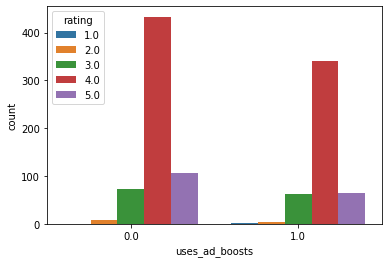

In [68]:
# show the frequency of each value in the 'uses_ad_boosts' column
sns.countplot(data=df, x='uses_ad_boosts', hue='rating')


from the plot it's obvious that the most products that has ad boosts features has high rate.



In [69]:
#converts the data type of the specified columns in a pandas dataframe to 'category'.
df[columns] = df[columns].astype('category')
#list of column names that are being converted to the 'category' data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   price                         1572 non-null   float64 
 1   retail_price                  1572 non-null   float64 
 2   units_sold                    1572 non-null   float64 
 3   uses_ad_boosts                1572 non-null   float64 
 4   rating                        1093 non-null   float64 
 5   rating_count                  1572 non-null   float64 
 6   badges_count                  1572 non-null   float64 
 7   badge_local_product           1572 non-null   category
 8   badge_product_quality         1572 non-null   category
 9   badge_fast_shipping           1572 non-null   category
 10  tags                          1572 non-null   object  
 11  product_color                 1572 non-null   category
 12  product_variation_size_id     1572 non-null   ca

After all of that now our data is clean, now let's convert categorical columns and string columns to numeric columns to make the models able to learn from them.

# First: 
**tags columns**
tags column is an string column and has a lot of unique values so it is not a good idea to convert it to numerical column using one hot encoding method, instead we will use CountVectorizer method.

CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

In [70]:
'''transforms a text column in a pandas dataframe into a set of numerical features using the CountVectorizer class 
from scikit-learn. The resulting feature matrix is stored in a pandas dataframe.'''
# Convert ENGLISH_STOP_WORDS to a list
stop_words = list(ENGLISH_STOP_WORDS)
# Build object
vect = CountVectorizer(stop_words=stop_words)
# Define the column
text = df['tags']
# Extract words
vect.fit(text)
# Get feature names
feature_names = vect.get_feature_names_out()
# Transform tags to vectors
train = vect.fit_transform(text)
train.toarray()
# Convert train array to dataframe
data = pd.DataFrame(train.toarray(), columns=feature_names)
data.shape

(1572, 2067)

In [71]:
#merge new columns to the dataframe and drop tags column
df = pd.concat([df.drop(['tags'],axis=1),data], axis=1, join='inner')

**Second: convert categorical columns to numerical columns using one hot encoding method.**

In [72]:
#categorical columns
features = ["product_variation_size_id","shipping_option_name",'product_color','origin_country']
df = pd.get_dummies(df, columns = features)

Let's split train set and test set



In [73]:
#split X_test
X_test = df.iloc[df1.shape[0]:,:]
#X_train split
X_train = df.iloc[:df1.shape[0],:]
#drop rating column from X_test (anyway all values in X_test rating is null because orginal test set doesn't have rating column)
X_test = X_test.drop(['rating'],axis=1)
#drop any duplicated values from X_train
X_train = X_train.drop_duplicates()
#extract labels
y_train = X_train['rating']
#drop rating column from X_train.
X_train = X_train.drop(['rating'],axis = 1)

** model 1: Decision tree using grid search to tune hyperparameters**

In [74]:
#First model: Decision tree using grid search to tune hyperparameters
#Define the hyperparameters to tune for the decision tree model using a dictionary
DT_param_1 = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split':[2,3,4,5],
    'criterion': ["entropy", "gini"]
}
#Create a new instance of the DecisionTreeClassifier model
model_dt_1 = DecisionTreeClassifier()
#Use grid search to find the best hyperparameters for the model
grid_search = GridSearchCV(estimator=model_dt_1, param_grid= DT_param_1, cv=5, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)
#Make predictions on the test set using the best hyperparameters found by grid search
predicted_test_dt = grid_search.predict(X_test)
print(f"best hyperparameters found are {grid_search.best_estimator_}")
predicted_test_dt.astype(float)
print(Counter(predicted_test_dt))
#Create a new csv file with the predicted ratings and corresponding ids from the test set
create_sample_file('Descision_tree_output_1.csv',predicted_test_dt,X_test['id'])
#Read in the new csv file and print the frequency count of each predicted rating value
check_dt_1 = pd.read_csv('Descision_tree_output_1.csv')
print(Counter(check_dt_1['rating']))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
best hyperparameters found are DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
Counter({4.0: 443, 5.0: 24, 3.0: 10, 2.0: 2})
Counter({4.0: 443, 5.0: 24, 3.0: 10, 2.0: 2})


** model 2: Decision tree with tuning hyperparameters manually.**

In [75]:
#Define a decision tree model with hyperparameters that were tested in previous trials
#model_dt_2 = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 2, criterion = 'gini') first trial: f1-score 76.643, I will decrease the max-depth values and increase the min_samples_leaf by one
#model_dt_2 = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 3, criterion = 'gini') second trial: f1-score 77.643, I will change the criterion from gini to entropy
#model_dt_2 = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 3, criterion = 'entropy') second trial: f1-score 79.03, I will change the min_sample_leaf to 2
model_dt_2 = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 3, min_samples_split = 6, criterion = 'entropy') #best hyper parameters with f1 score 79.991
#Fit the decision tree model to the training data
model_dt_2.fit(X_train, y_train)
#Use the trained decision tree model to make predictions on the test data
predicted_test_dt_2 = grid_search.predict(X_test)
#Cast the predicted ratings to float data type
predicted_test_dt_2.astype(float)
print(Counter(predicted_test_dt_2))
create_sample_file('Descision_tree_output_2.csv',predicted_test_dt_2,X_test['id'])
check_dt_1 = pd.read_csv('Descision_tree_output_2.csv')
print(Counter(check_dt_1['rating']))

Counter({4.0: 443, 5.0: 24, 3.0: 10, 2.0: 2})
Counter({4.0: 443, 5.0: 24, 3.0: 10, 2.0: 2})


** model 3: SVM with using grid search to tune hyperparameters**

In [76]:
#Define the hyperparameters to tune for the SVM model using a dictionary
svm_param_1 = {
    'C': [0.01,0.1,1.0],
    'kernel' : ['linear', 'rbf'],
    'gamma': [0.5,0.1,1]
}
#Create a new instance of the SVM model
model_svm_1 = SVC(probability=True)
#Use grid search to find the best hyperparameters for the model
grid_search = GridSearchCV(estimator=model_svm_1, param_grid= svm_param_1, cv=5, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)
predicted_test_svm = grid_search.predict(X_test)
print(f"best hyperparameters found are {grid_search.best_estimator_}")
#Print the frequency count of each predicted rating value using the Counter function
predicted_test_svm.astype(float)
print(Counter(predicted_test_svm))
#Create a new csv file with the predicted ratings and corresponding ids from the test set
create_sample_file('SVM_output_1.csv',predicted_test_svm,X_test['id'])
#Read in the new csv file and print the frequency count of each predicted rating value
check_svm_1 = pd.read_csv('SVM_output_1.csv')
print(Counter(check_svm_1['rating']))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
best hyperparameters found are SVC(gamma=0.1, probability=True)
Counter({4.0: 436, 3.0: 26, 5.0: 16, 2.0: 1})
Counter({4.0: 436, 3.0: 26, 5.0: 16, 2.0: 1})


** model 4: SVM with tuning hyperparameters manually.**

In [77]:
#Define an SVM model with hyperparameters that were tested in previous trials
#model_svm_2 = SVC(C= 0.01, kernel = 'linear', gamma= 0.5,probability=True) trial 1: with f1 score= 0.65321 you need to make the model more complex (change the kernel)
#model_svm_2 = SVC(C= 0.1, kernel='poly',degree= 4 , probability=True) trial 2: with f1 score = 0.683213 you need to change the kernel to rbf
#model_svm_2 = SVC(C = 10, kernel ='rbf',probability=True) trial 3: with f1 score 0.653213 change the kernel to poly and make it more simpler.
model_svm_2 = SVC(C = 1, kernel ='poly',degree = 2,probability=True) #best f1 score with 0.77500
#Fit the SVM model to the training data
model_svm_2.fit(X_train, y_train)
#Use the trained SVM model to make predictions on the test data
predicted_test_svm_2 = grid_search.predict(X_test)
#Cast the predicted ratings to float data type
predicted_test_svm_2.astype(float)
print(Counter())
create_sample_file('SVM_output_2.csv',predicted_test_svm_2,X_test['id'])
check_svm_2 = pd.read_csv('SVM_output_2.csv')
print(Counter(check_svm_2['rating']))

Counter()
Counter({4.0: 436, 3.0: 26, 5.0: 16, 2.0: 1})


** model 5: Multinomial with tuning hyperparameters manually.**

In [78]:
#Define a Naive Bayes model with a given alpha value
#clf = MultinomialNB(alpha=0.01) trial 1: f1-score 60.1231 a lot of missclassified values, maybe it's an overfitting use a highr alpha
#clf = MultinomialNB(alpha= 0.05) trial 2:  f1-score 70.31 you still need to use a higher alpha
#clf = MultinomialNB(alpha = 0.1) trial 3: f1-score 70.31 you still need to use a higher alpha
clf = MultinomialNB(alpha = 0.5) # last trial best f1 score 0.75732
#Fit the Naive Bayes model to the training data
clf.fit(X_train, y_train)
#Use the trained Naive Bayes model to make predictions on the test data
predicted_test_NV = clf.predict(X_test)
print(Counter(predicted_test_NV))
#Cast the predicted ratings to float data type
predicted_test_NV.astype(float)
print(predicted_test_NV.dtype)
#Create a new csv file with the predicted ratings and corresponding ids from the test set
create_sample_file('NV_output.csv',predicted_test_NV,X_test['id'])
#Read in the new csv file and print the frequency count of each predicted rating value
check_NV = pd.read_csv('NV_output.csv')
print(Counter(check_NV['rating']))

Counter({4.0: 398, 5.0: 49, 3.0: 29, 2.0: 3})
float64
Counter({4.0: 398, 5.0: 49, 3.0: 29, 2.0: 3})
